In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt
from plot_result import plot_result

In [2]:
df=pd.read_csv("../../data/merged/len3_ship_DN.csv",encoding="shift-jis",index_col=0)
# sum ver.
# df=pd.read_csv("../data/merged/len3_ship_sum_DN.csv",encoding="shift-jis",index_col=0)

Estimation

In [3]:
# normalization of year
# 2008で正規化するかで結構estimateが変わります、1ぐらい
# df["year"]=df["year"]-2008

#ここはかなり重要でセレクションバイアスみたいなので有意性が変わるらしい
df=df.loc[df["otc_dom"]>0]
df=df.loc[df["rx_dom"]>0]
df=df.loc[df["generic_share_q"]>0]
# make log columns
df["log_rx_dom"]=np.log(df["rx_dom"])
df["log_otc_dom"]=np.log(df["otc_dom"])
df["log_stock_rx_lag"]=np.log(df["stock_rx_lag"]+0.001)
df["log_stock_otc_lag"]=np.log(df["stock_otc_lag"]+0.001)
df["year_trend"]=df["year"]-2008

In [4]:
df=df.set_index(["id","year"])
df.info()
# make this to paneldata
df=PanelData(df)
df.shape

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 249 entries, (114, 2008) to (799, 2021)
Data columns (total 99 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   efficacy           249 non-null    object 
 1   rx_dom             249 non-null    int64  
 2   otc_dom            249 non-null    float64
 3   self_dom           249 non-null    int64  
 4   stock_rx           249 non-null    float64
 5   stock_otc          249 non-null    float64
 6   stock_self         249 non-null    float64
 7   stock_rx_lag       232 non-null    float64
 8   stock_otc_lag      232 non-null    float64
 9   stock_self_lag     232 non-null    float64
 10  Approved           249 non-null    float64
 11  KEGG               249 non-null    object 
 12  Ingredient         249 non-null    object 
 13  date               249 non-null    object 
 14  release_year       249 non-null    float64
 15  成分                 249 non-null    object 
 16  variable

(184, 14, 21)

stockのlag(むしろgeneric?)とtime effectは共存できないらしい

## RX

In [5]:
# formula="rx_dom ~ year_trend+elapsed_m10+elapsed_m9+elapsed_m8+elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+generic_per+TimeEffects+EntityEffects"
# # stock lag version
# # formula+="+stock_rx_lag"
# # gemeric_per
# formula+=" + generic_per"
# mod_fe=PanelOLS.from_formula(formula, data=df,drop_absorbed=True)
# res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# # print(res_fe.summary.tables[1])
# # print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="rx",title="rx",period=25,insert_index=9,time_start=-10)
# # print(x)

In [6]:
[0]*5

[0, 0, 0, 0, 0]

c:\Users\hakos\AppData\Local\Programs\Python\Python310\lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
C:\Users\hakos\AppData\Local\Temp\ipykernel_24668\1077899798.py:16: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

year_trend

  res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)


                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
elapsed_m10             -0.0562     0.0873    -0.6434     0.5208     -0.2285      0.1162
elapsed_m9              -0.0828     0.1558    -0.5316     0.5957     -0.3902      0.2246
elapsed_m8              -0.0512     0.0970    -0.5283     0.5980     -0.2426      0.1402
elapsed_m7              -0.0264     0.0774    -0.3416     0.7331     -0.1791      0.1263
elapsed_m6               0.0386     0.0680     0.5679     0.5708     -0.0956      0.1729
elapsed_m5               0.0977     0.0884     1.1046     0.2709     -0.0769      0.2722
elapsed_m4               0.0657     0.0526     1.2487     0.2135     -0.0381      0.1695
elapsed_m3               0.0268     0.0357     0.7511     0.4536     -0.0437      0.0973
elapsed_m2           

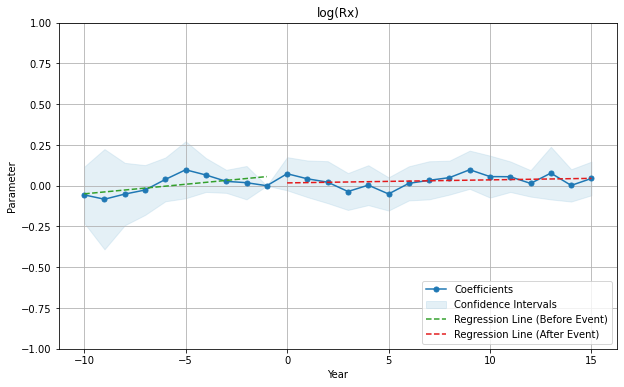

In [7]:
# take log
formula="log_rx_dom ~ year_trend+elapsed_m10+elapsed_m9+elapsed_m8+elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"
# stock lag version
formula+="+log_stock_rx_lag"

# generic_per
# formula+=" + generic_per"

# generic_share_r
# formula+=" + generic_share_r"

# generic_share_q
formula+=" + log(generic_share_q)"

mod_fe=PanelOLS.from_formula(formula, data=df,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
print(res_fe.summary.tables[0])
plot_result(res_fe,file_name="rx_log",title="log(Rx)",period=25,insert_index=9,time_start=-10)

### OTC

In [8]:

# formula="otc_dom ~ year_trend+elapsed_m10+elapsed_m9+elapsed_m8+elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+generic_per+TimeEffects+EntityEffects"
# # stock lag version
# # formula+="+stock_otc_lag"
# # gemeric_per
# formula+=" + generic_per"
# mod_fe=PanelOLS.from_formula(formula, data=df, drop_absorbed=True)
# # mod_fe=PanelOLS.from_formula(formula, data=df, drop_absorbed=False)
# res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# plot_result(res_fe,file_name="otc",title="OTC",period=25,insert_index=9,time_start=-10)

c:\Users\hakos\AppData\Local\Programs\Python\Python310\lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


                          PanelOLS Estimation Summary                           
Dep. Variable:            log_otc_dom   R-squared:                        0.3284
Estimator:                   PanelOLS   R-squared (Between):              0.1741
No. Observations:                 232   R-squared (Within):               0.3051
Date:                Tue, Jan 09 2024   R-squared (Overall):              0.1768
Time:                        00:20:28   Log-likelihood                   -150.44
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3.1152
Entities:                          21   P-value                           0.0000
Avg Obs:                       11.048   Distribution:                  F(27,172)
Min Obs:                       1.0000                                           
Max Obs:                       13.000   F-statistic (robust):          6.085e+14
                            

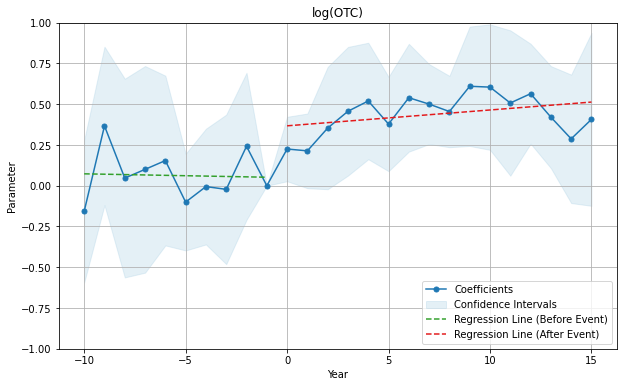

In [9]:
# take log
formula="log_otc_dom ~elapsed_m10+elapsed_m9+elapsed_m8+elapsed_m7+elapsed_m6+ elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+generic_per+TimeEffects+EntityEffects"

# till 15
formula="log_otc_dom ~elapsed_m10+elapsed_m9+elapsed_m8+elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"

# stock lag version
formula+="+log_stock_otc_lag"

# year trend
# formula+="+year_trend"

# gemeric_per
# formula+=" + generic_per"

# generic_share_r
# formula+=" + generic_share_r"
# generic_share_q
# formula+=" + generic_share_q"
formula+=" + log(generic_share_q)"


mod_fe=PanelOLS.from_formula(formula, data=df,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# res_fe=mod_fe.fit()
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
plot_result(res_fe,file_name="otc_log",title="log(OTC)",period=25,insert_index=9,time_start=-10)